<a href="https://colab.research.google.com/github/bobi404/Scientific-Computing-LAB/blob/main/SC_Sesi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Linear Interpolation

In [4]:
x = [0,1,2]
y = [1,3,2]

In [5]:
f = interp1d(x,y)
y_ask = f(1.5)
print(y_ask)

2.5


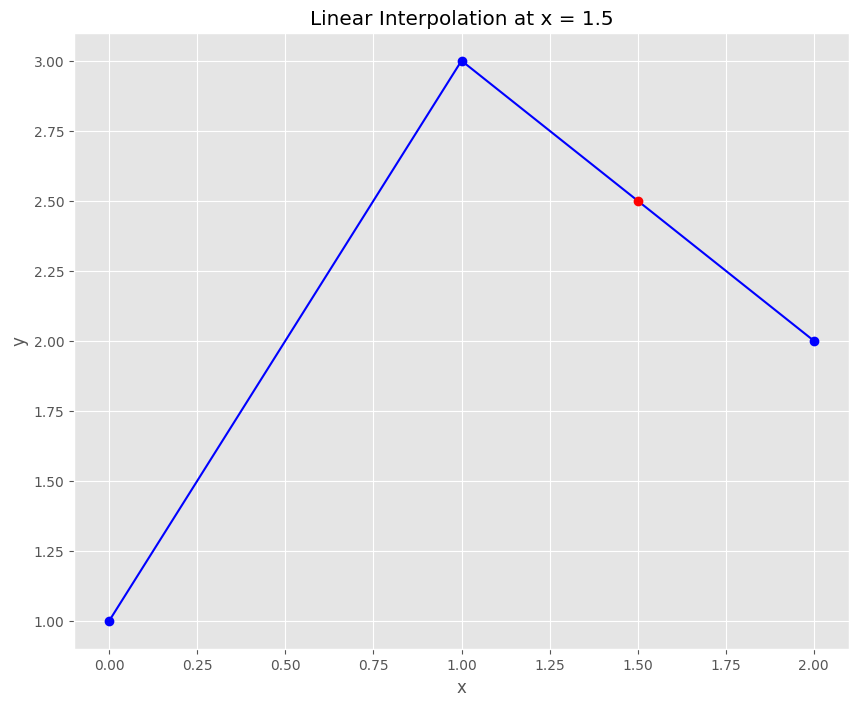

In [7]:
plt.figure(figsize = (10,8))
plt.plot(x,y, '-ob')
plt.plot(1.5, y_ask, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
x = [0,1,2,3,4,5]
y = [1,3,3,5,2,2]

In [9]:
f = interp1d(x,y)

x_lin = np.linspace(0,5,100)
y_lin = f(x_lin)

y_ask = f(3.1)
print(y_ask)

4.699999999999999


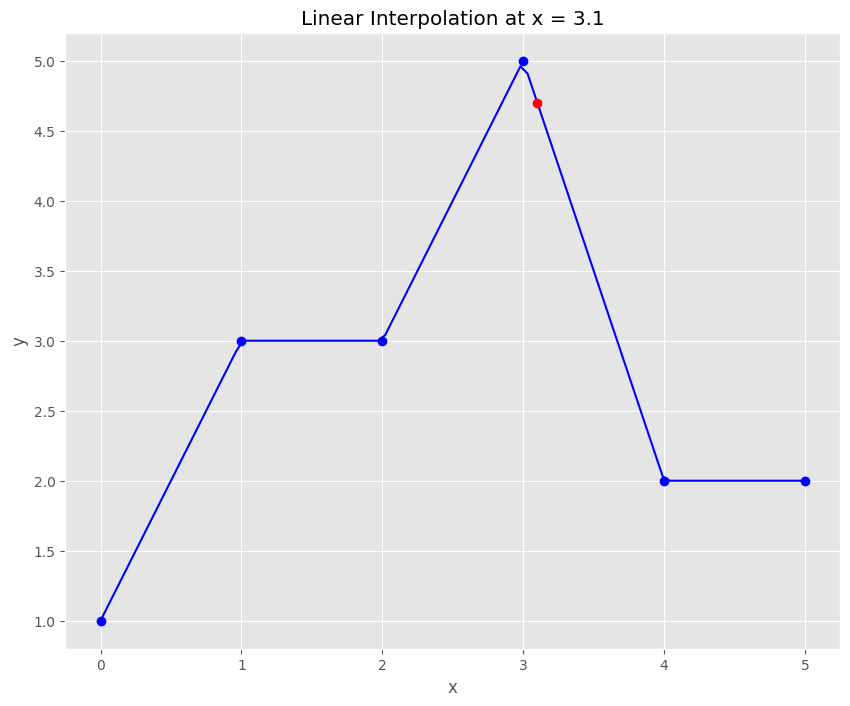

In [10]:
plt.figure(figsize = (10,8))
plt.plot(x,y, 'ob')
plt.plot(x_lin, y_lin, 'b')
plt.plot(3.1, y_ask, 'ro')
plt.title('Linear Interpolation at x = 3.1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Newton Interpolation

In [11]:
%matplotlib inline
def divided_diff(x,y):
  '''
  function to calculate the divided
  differences table
  '''
  n = len(y)
  coef = np.zeros([n,n])

  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x - x_data[n-k])*p
  return p


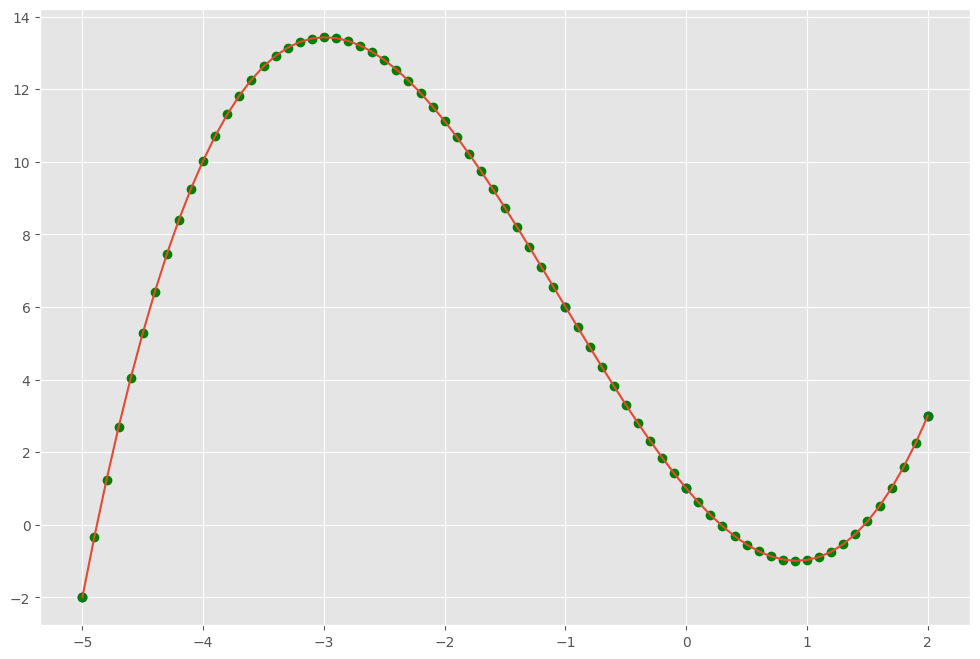

In [13]:
x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])

a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-5,2.1,.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x,y, 'ob')
plt.plot(x_new, y_new, 'go')
plt.plot(x_new, y_new)